In [1]:
import pandas as pd
df = pd.read_csv('/content/hepatitis.csv')
df.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1,2,2,2,2,1,...,2,2,2,2,1,85,18,4,?,1
1,2,2,50,1,1,2,1,2,2,1,...,2,2,2,2,0.9,135,42,3.5,?,1
2,3,2,78,1,2,2,1,2,2,2,...,2,2,2,2,0.7,96,32,4,?,1
3,4,2,31,1,?,1,2,2,2,2,...,2,2,2,2,0.7,46,52,4,80,1
4,5,2,34,1,2,2,2,2,2,2,...,2,2,2,2,1,?,200,4,?,1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from mpl_toolkits.mplot3d import Axes3D


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          155 non-null    int64 
 1   target      155 non-null    int64 
 2   age         155 non-null    int64 
 3   gender      155 non-null    int64 
 4   steroid     155 non-null    object
 5   antivirals  155 non-null    int64 
 6   fatigue     155 non-null    object
 7   malaise     155 non-null    object
 8   anorexia    155 non-null    object
 9   liverBig    155 non-null    object
 10  liverFirm   155 non-null    object
 11  spleen      155 non-null    object
 12  spiders     155 non-null    object
 13  ascites     155 non-null    object
 14  varices     155 non-null    object
 15  bili        155 non-null    object
 16  alk         155 non-null    object
 17  sgot        155 non-null    object
 18  albu        155 non-null    object
 19  protime     155 non-null    object
 20  histology 

In [4]:
df.describe()

,ID,target,age,gender,antivirals,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,1.793548,41.200000,1.103226,1.845161,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000
25%,39.500000,2.000000,32.000000,1.000000,2.000000,1.000000
50%,78.000000,2.000000,39.000000,1.000000,2.000000,1.000000
75%,116.500000,2.000000,50.000000,1.000000,2.000000,2.000000
max,155.000000,2.000000,78.000000,2.000000,2.000000,2.000000


In [5]:
print(df.isnull().sum())


ID            0
target        0
age           0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
bili          0
alk           0
sgot          0
albu          0
protime       0
histology     0
dtype: int64


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df[df.select_dtypes(include=['float64', 'int64']).columns] = df[df.select_dtypes(include=['float64', 'int64']).columns].apply(lambda x: x.fillna(x.median()))
df[df.select_dtypes(include=['object']).columns] = df[df.select_dtypes(include=['object']).columns].apply(lambda x: x.fillna(x.mode()[0]))

df.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1,2,2,2,2,1,...,2,2,2,2,1,85,18,4,?,1
1,2,2,50,1,1,2,1,2,2,1,...,2,2,2,2,0.9,135,42,3.5,?,1
2,3,2,78,1,2,2,1,2,2,2,...,2,2,2,2,0.7,96,32,4,?,1
3,4,2,31,1,?,1,2,2,2,2,...,2,2,2,2,0.7,46,52,4,80,1
4,5,2,34,1,2,2,2,2,2,2,...,2,2,2,2,1,?,200,4,?,1


In [8]:
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

print("\n=== Data Setelah Encoding ===")
print(df.head())

target_candidates = ['class', 'Class', 'target', 'Target', 'Outcome', 'Die', 'Alive']
target_col = None

for c in df.columns:
    if c in target_candidates:
        target_col = c
        break

if target_col is None:
    target_col = df.columns[-1]

print(f"\nKolom Target yang Digunakan: {target_col}")



=== Data Setelah Encoding ===
   ID  target  age  gender  steroid  antivirals  fatigue  malaise  anorexia  \
0   1       2   30       2        0           2        1        1         1   
1   2       2   50       1        0           2        0        1         1   
2   3       2   78       1        1           2        0        1         1   
3   4       2   31       1        2           1        1        1         1   
4   5       2   34       1        1           2        1        1         1   

   liverBig  ...  spleen  spiders  ascites  varices  bili  alk  sgot  albu  \
0         0  ...       1        1        1        1     7   76    24    16   
1         0  ...       1        1        1        1     6   17    52    11   
2         1  ...       1        1        1        1     4   82    46    16   
3         1  ...       1        1        1        1     4   49    60    16   
4         1  ...       1        1        1        1     7   83    29    16   

   protime  histology  
0


=== Pembagian Jumlah Data Tiap Kelas ===
target
2    123
1     32


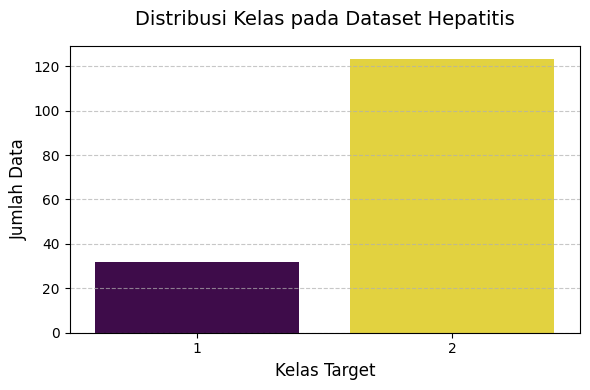

In [9]:

print("\n=== Pembagian Jumlah Data Tiap Kelas ===")
print(df[target_col].value_counts().to_string())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=target_col, hue=target_col, palette='viridis', legend=False)
plt.title('Distribusi Kelas pada Dataset Hepatitis', fontsize=14, pad=15)
plt.xlabel('Kelas Target', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:

X = df.drop(columns=[target_col])
y = df[target_col]
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (155, 20)
y shape: (155,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:

svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)


In [14]:

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)


SVC(random_state=42)

In [15]:

y_pred_linear = svm_linear.predict(X_test)

acc_linear = accuracy_score(y_test, y_pred_linear)

print("\n=== 📊 Akurasi Model ===")
print(f"SVM Linear : {acc_linear*100:.2f}%")

print("\n=== 🔎 Classification Report (Linear) ===")
print(classification_report(y_test, y_pred_linear))



=== 📊 Akurasi Model ===
SVM Linear : 74.19%

=== 🔎 Classification Report (Linear) ===
              precision    recall  f1-score   support

           1       0.43      0.43      0.43         7
           2       0.83      0.83      0.83        24

    accuracy                           0.74        31
   macro avg       0.63      0.63      0.63        31
weighted avg       0.74      0.74      0.74        31



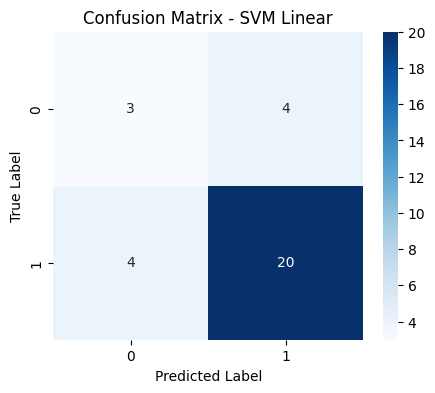

In [16]:

cm = confusion_matrix(y_test, y_pred_linear)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM Linear')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Now, let's evaluate the model on the test set.

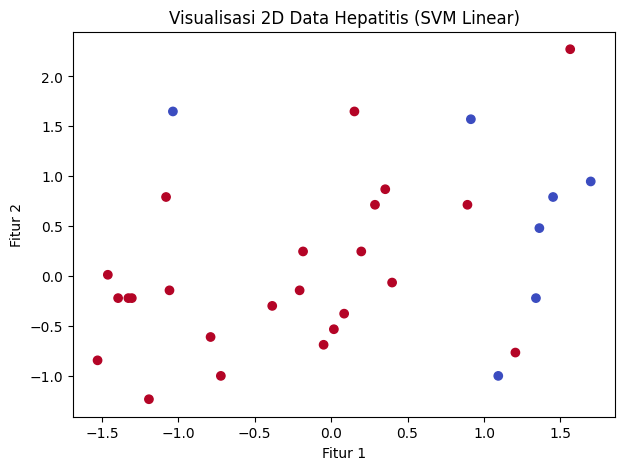

In [17]:

plt.figure(figsize=(7, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_linear, cmap='coolwarm')
plt.title("Visualisasi 2D Data Hepatitis (SVM Linear)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()


Let's train a Support Vector Machine (SVM) model to detect fraud.

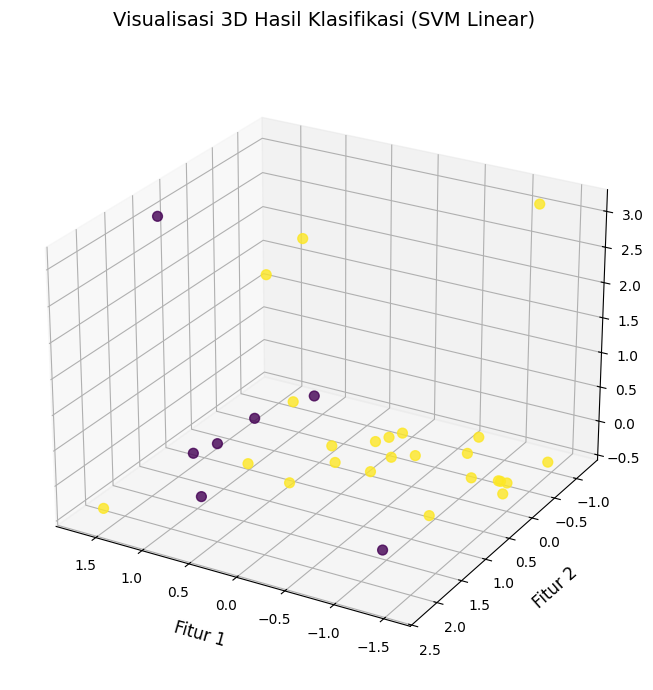

In [18]:

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred_linear, cmap='viridis', s=50, alpha=0.8)
ax.set_title("Visualisasi 3D Hasil Klasifikasi (SVM Linear)", fontsize=14, pad=20)
ax.set_xlabel("Fitur 1", labelpad=10, fontsize=12)
ax.set_ylabel("Fitur 2", labelpad=10, fontsize=12)
ax.set_zlabel("Fitur 3", labelpad=10, fontsize=12)


ax.view_init(elev=25, azim=120)

plt.tight_layout()
plt.show()
